In [1]:
import ROOT, os, sys, glob
from math import *
ROOT.EnableImplicitMT(4); 

Welcome to JupyROOT 6.28/00


In [2]:
list(glob.glob("/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/*125X_v0.0.root"))

['/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_BsToMuMu_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-10To50_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-50_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M2_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M5_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_JPsiToMuMu_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_PU200.125X_v0.0.root']

In [3]:
rdf = ROOT.RDataFrame("Events", "/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_BsToMuMu_PU200.125X_v0.0.root")


In [4]:
rdf.Describe()

Dataframe from TChain Events in file /eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_BsToMuMu_PU200.125X_v0.0.root

Property                Value
--------                -----
Columns in total           34
Columns from defines        0
Event loops run             0
Processing slots            4

Column          Type                            Origin
------          ----                            ------
GenMu_charge    ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_d0        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_eta       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_isFromTau ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_isPrompt  ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_mass      ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_phi       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_pt        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_vz        ROOT::VecOps::RVec<Float_t>     Dataset
TkMu_GenMuFlav  ROOT::VecOps::RVec<UChar_t>     Dataset
TkMu_GenMuIdx   ROO

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


Processed 48553 entries


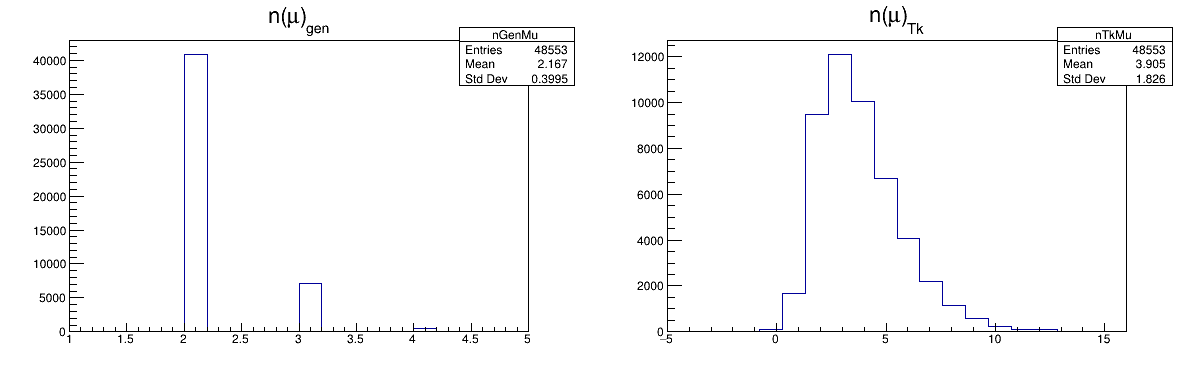

In [5]:
##plotting histograms
hnGenMu = rdf.Histo1D(("nGenMu","n(#mu)_{gen};",20,1,5),"nGenMu")
hnTkMu = rdf.Histo1D(("nTkMu","n(#mu)_{Tk};",20,-5,16),"nTkMu")
entries = rdf.Count().GetValue();
print(f"Processed {entries} entries")

c1 = ROOT.TCanvas("c1","c1",1200,400)
c1.Divide(2,1)
c1.cd(1)
hnGenMu.Draw()
c1.cd(2)
hnTkMu.Draw()
c1.Draw()



In [6]:
# #we now need to pair up our muons I WROTE THIS

# def makedimuon(name,rdf):
# #let us make index pairs
#     rdf = rdf.Define(f"{name}DiMu_indices",f"""
#     std::vector<std::pair<int,int>> ret;
#     for(int i = 0, n = n{name}Mu; i < n; ++i)
#         for(int i2 = i+1; i2 < n; ++i2)
#             ret.emplace_back(i,i2);
#     return ret;""")
    
#     rdf = rdf.Define(f"n{name}_diMu",f"{name}DiMu_indices.size()")

# #let us calculate di-muon mass
#     rdf = rdf.Define(f"{name}DiMu_mass", f"""
#     ROOT::RVecF ret;
#     for (const auto & pair : {name}DiMu_indices)
#         ret.emplace_back({name}Mu_mass[pair.first]+{name}Mu_mass[pair.second]);
#         return ret;""")
    
# #let us calculate di-muon charge    
#     rdf = rdf.Define(f"{name}DiMu_charge", f"""
#     ROOT::RVecI ret;
#     for(const auto & pair : {name}DiMu_indices)
#         ret.emplace_back({name}Mu_charge[pair.first]+{name}Mu_charge[pair.second]);
#         return ret;""")
#     return rdf;

# rdf_gendimuon = makedimuon("Gen",rdf)
# hnGenDiMu = rdf_gendimuon.Histo1D(("nGen_diMu","",7,-0.5,10),"nGen_diMu")
# hGenDiMu_charge = rdf_gendimuon.Histo1D(("GenDiMu_charge","q(#mu#mu)_{gen}; q",7,-3.5,3.5),"GenDiMu_charge")
# hGenDiMu_mass = rdf_gendimuon.Histo1D(("GenDiMu_mass","M(#mu#mu)_{gen}; mass",7,-5,5),"GenDiMu_mass")
# entries =rdf.Count().GetValue()
# print(f"Processed {entries} entries")
# c2= ROOT.TCanvas("c2","c2",1200,400)
# c2.Divide(3,1)
# c2.cd(1)
# hGenDiMu_charge.Draw()
# hnGenDiMu.Draw()
# c2.cd(2)
# hGenDiMu_mass.Draw()
# c2.cd(3)
# hGenDiMu_charge.Draw()
# c2.Draw()


Processed 48553 entries.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


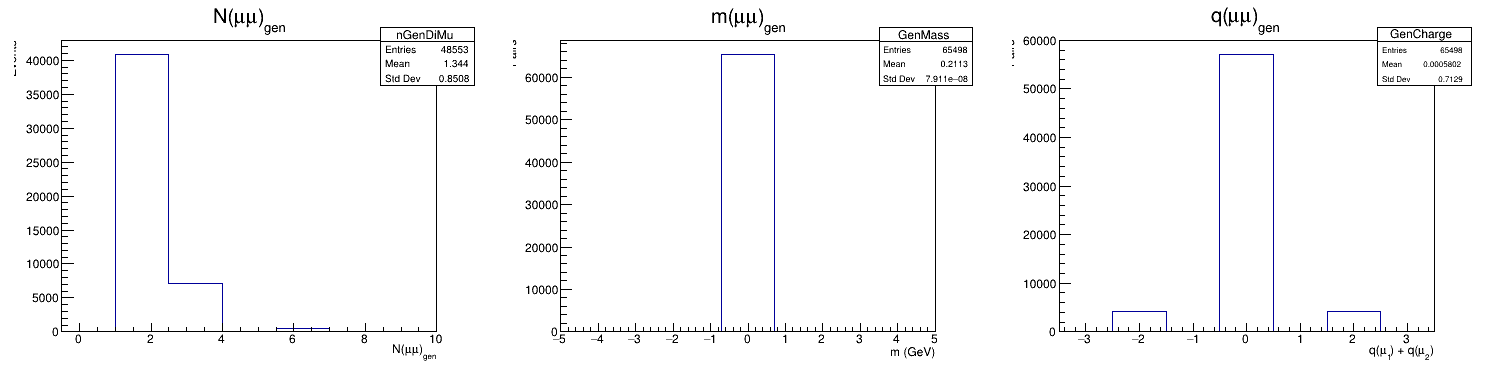

In [7]:

## Now we make pairs of muons
## This needs a bit of inlined C++ code
def makeDimuonPairs(name, rdf):
    ## define 4-vectors in cartesian coordinates, for easier 
    #rdf = rdf.Define(f"{name}Mu_p4", f"ROOT::VecOps::Construct<ROOT::Math::XYZTVector>(ROOT::VecOps::Construct<ROOT::Math::PtEtaPhiMVector>({name}Mu_pt,{name}Mu_eta,{name}Mu_phi,{name}Mu_mass))")
    ## make indices of all the pairs
    rdf = rdf.Define(f"{name}DiMu_indices", f"""
        std::vector<std::pair<int,int>> ret; 
        for (int i = 0, n = n{name}Mu; i < n; ++i) 
            for (int i2 = i+1; i2 < n; ++i2) 
                ret.emplace_back(i,i2);
        return ret;""")
    ## Make the number of dimuons, for convenience later
    rdf = rdf.Define(f"n{name}DiMu", f"{name}DiMu_indices.size()")
    ## compute the mass, charge
    rdf = rdf.Define(f"{name}DiMu_mass", f"""
        ROOT::RVecF ret; 
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back(({name}Mu_mass[pair.first]+{name}Mu_mass[pair.second]));
        return ret;""")
    
    
    rdf = rdf.Define(f"{name}DiMu_charge", f"""
        ROOT::RVecI ret; 
        for (const auto & pair : {name}DiMu_indices) 
            ret.emplace_back({name}Mu_charge[pair.first]+{name}Mu_charge[pair.second]);
        return ret;""")
    return rdf;


rdf_gendimu = makeDimuonPairs("Gen", rdf)

## Now we make a plot of the number of generated muons and the ones reconstructed by L1T
hNGenPairs = rdf_gendimu.Histo1D(("nGenDiMu","N(#mu#mu)_{gen};N(#mu#mu)_{gen};Events",7,-0.5,10), "nGenDiMu")
hGenPairMass = rdf_gendimu.Histo1D(("GenMass","m(#mu#mu)_{gen};m (GeV);Pairs",7,-5,5), "GenDiMu_mass")
hGenPairCharge = rdf_gendimu.Histo1D(("GenCharge","q(#mu#mu)_{gen};q(#mu_{1}) + q(#mu_{2});Pairs",7,-3.5,3.5), "GenDiMu_charge")
entries = rdf_gendimu.Count().GetValue()
print(f"Processed {entries} entries.")
## And plot it
c1 = ROOT.TCanvas("c1","c1", 1500, 400)
c1.Divide(3,1)
for i, h in enumerate([hNGenPairs,hGenPairMass,hGenPairCharge]):
    c1.cd(i+1)
    h.Draw()
c1.Draw()

#why are the number of entries higher here, is it because of a possible double counting

Processed 48553 entries.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


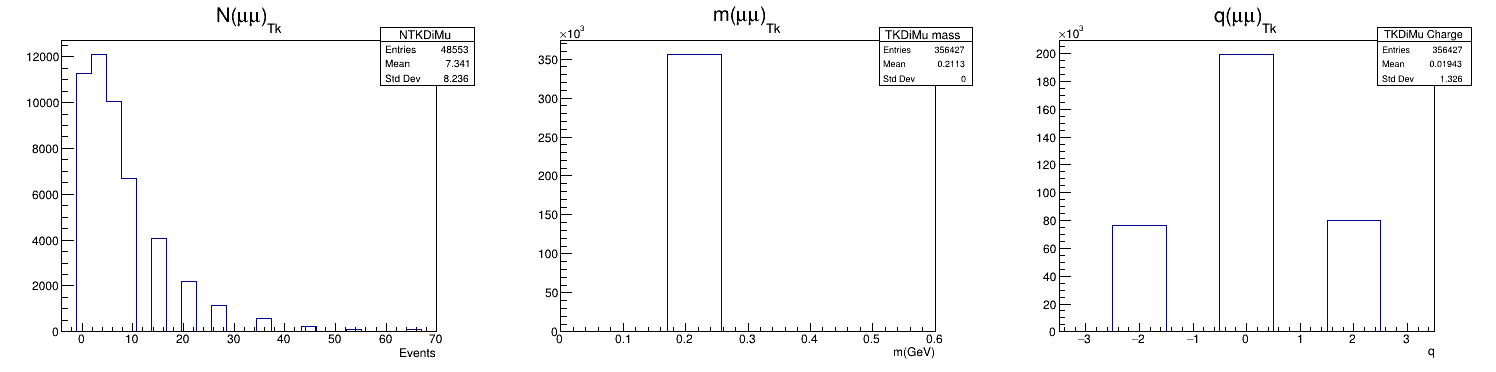

In [18]:
rdf_tkdimu = makeDimuonPairs("Tk", rdf_gendimu)

hNTkPairs = rdf_tkdimu.Histo1D(("NTKDiMu","N(#mu#mu)_{Tk};Events",25,-4,70),"nTkDiMu")
hTkPairMass = rdf_tkdimu.Histo1D(("TKDiMu mass","m(#mu#mu)_{Tk};m(GeV)",7,0,0.6),"TkDiMu_mass")
hTkPairCharge = rdf_tkdimu.Histo1D(("TKDiMu Charge","q(#mu#mu)_{Tk};q",7,-3.5,3.5),"TkDiMu_charge")
entries = rdf_tkdimu.Count().GetValue()
print(f"Processed {entries} entries.")
## And plot it
c1 = ROOT.TCanvas("c1","c1", 1500, 400)
c1.Divide(3,1)
for i, h in enumerate([hNTkPairs,hTkPairMass,hTkPairCharge]):
    c1.cd(i+1)
    h.Draw()
c1.Draw()

#again the umber if entries in m and q are way higher what could be the possible reason


Processed 48553 entries.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


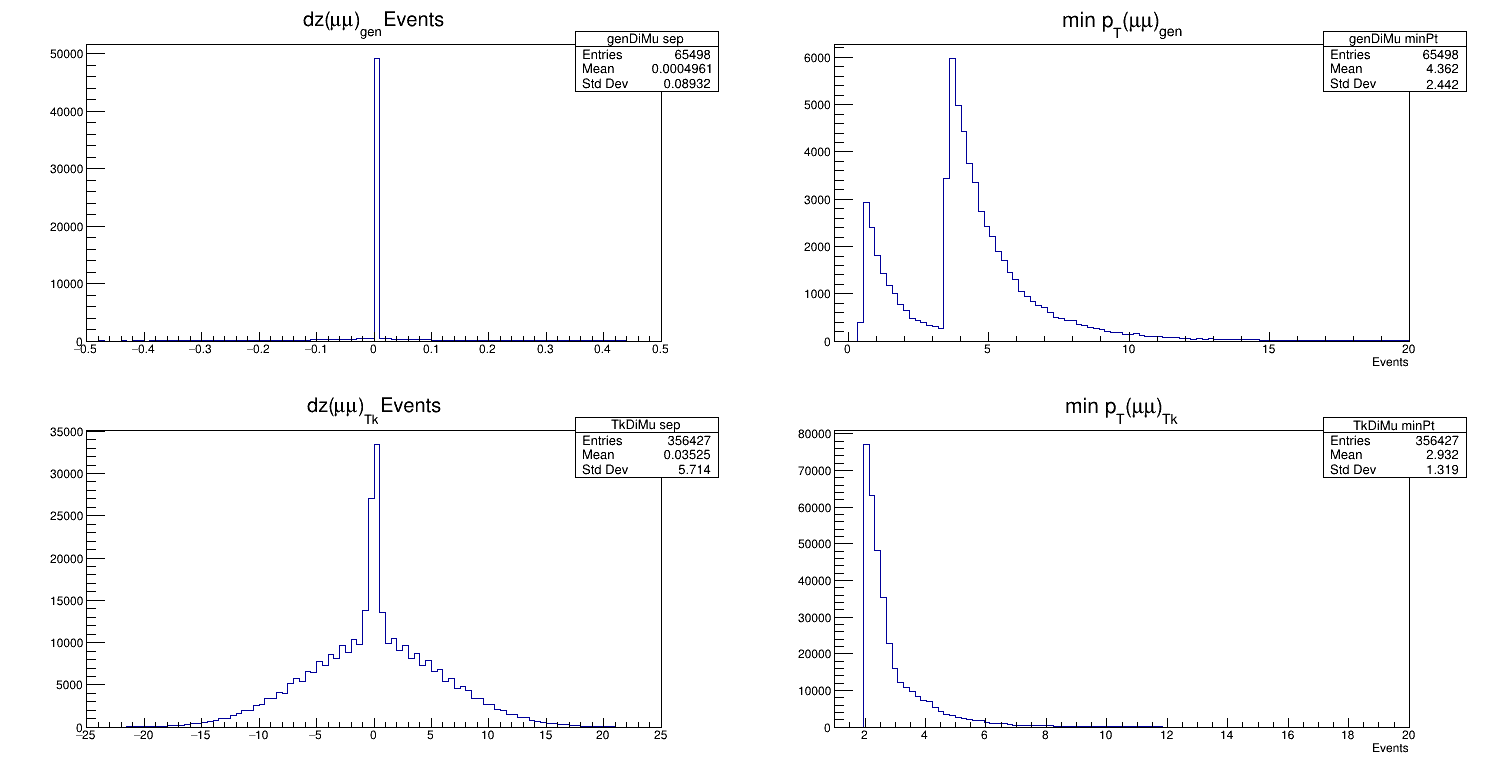

In [29]:
#some more 
def makemorevariables(name,rdf):
    #beam separation
    rdf = rdf.Define(f"{name}DiMu_dz",f"""
    ROOT::RVecF ret;
    for(const auto & pair : {name}DiMu_indices)
        ret.emplace_back({name}Mu_vz[pair.first]-{name}Mu_vz[pair.second]);
    return ret;""")
    
    #min pT
    rdf = rdf.Define(f"{name}DiMu_minPt", f"""
    ROOT::RVecF ret;
    for(const auto & pair : {name}DiMu_indices)
        ret.emplace_back(std::min({name}Mu_pt[pair.first],{name}Mu_pt[pair.second]));
    return ret;""")
    
    return rdf;

rdf_dimorevar = makemorevariables("Tk",makemorevariables("Gen",rdf_tkdimu))
hgenDiMu_sep = rdf_dimorevar.Histo1D(("genDiMu sep","dz(#mu#mu)_{gen}Events",100,-0.5,0.5), "GenDiMu_dz")
hgenDiMu_minPt = rdf_dimorevar.Histo1D(("genDiMu minPt","min p_{T}(#mu#mu)_{gen};Events",100,-0.5,20), "GenDiMu_minPt")
htkDiMu_sep = rdf_dimorevar.Histo1D(("TkDiMu sep","dz(#mu#mu)_{Tk}Events",100,-25,25), "TkDiMu_dz")
htkDiMu_minPt = rdf_dimorevar.Histo1D(("TkDiMu minPt","min p_{T}(#mu#mu)_{Tk};Events",100,1,20), "TkDiMu_minPt")
entries = rdf_gendimu.Count().GetValue()
print(f"Processed {entries} entries.")
## And plot it
c1 = ROOT.TCanvas("c1","c1", 1500, 800)
c1.Divide(2,2)
for i, h in enumerate([hgenDiMu_sep, hgenDiMu_minPt, htkDiMu_sep, htkDiMu_minPt]):
    c1.cd(i+1)
    h.Draw()
c1.Draw()
